In [1]:
import psycopg2 as pg
import pandas as pd
import pytz
tz = pytz.timezone("Asia/Shanghai")

# get connected to the database
connection = pg.connect("dbname=postgres user=sche")
dataframe = pd.read_sql_query("""set max_parallel_workers_per_gather = 4;
SELECT time,biketype,distid,lon,lat from mobike where time between '2017-01-19 00:00:00' and '2017-01-19 23:59:59'""", 
                              con = connection, index_col='time')
connection.close()
d = dataframe.drop_duplicates(subset=['distid','lat','lon'],keep='first')
d = d.tz_convert(tz)

In [41]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-notebook')

总共有单车

In [2]:
total_cycles = len(d['distid'].unique())
total_cycles

60920

单车种类

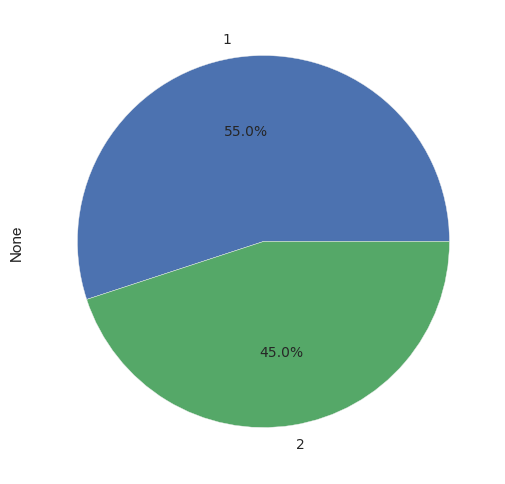

In [77]:
bike_types =d[['distid','biketype']].drop_duplicates(subset=['distid', 'biketype']).groupby('biketype').size()
bike_types.plot.pie(figsize=(6,6),autopct='%1.1f%%')

计算距离

In [4]:
from geopy.distance import great_circle
def calc_distance(r):
    return great_circle((r['lon'], r['lat']), (r['lon2'], r['lat2'])).meters
    
def shift_loc(group):
    group[['lon2','lat2']] = group[['lon','lat']].shift(1)
    group['distance'] = group.apply(calc_distance, axis=1)
    return group.dropna()

g=d.groupby('distid')
shifted = g.apply(shift_loc)
shifted

biketype     distid         lon  \
distid    time                                                         
280010003 2017-01-19 01:03:02+08:00         1  280010003  104.037416   
          2017-01-19 02:07:55+08:00         1  280010003  104.037471   
          2017-01-19 03:09:09+08:00         1  280010003  104.037721   
          2017-01-19 04:10:10+08:00         1  280010003  104.037428   
          2017-01-19 05:12:26+08:00         1  280010003  104.037408   
          2017-01-19 06:02:20+08:00         1  280010003  104.037528   
          2017-01-19 06:14:59+08:00         1  280010003  104.037510   
          2017-01-19 07:04:09+08:00         1  280010003  104.037507   
          2017-01-19 08:02:15+08:00         1  280010003  104.037430   
          2017-01-19 08:15:50+08:00         1  280010003  104.037454   
          2017-01-19 09:08:36+08:00         1  280010003  104.037477   
          2017-01-19 10:08:35+08:00         1  280010003  104.037322   
          2017-01-19 11:08:07+08:00         1  280010003  104.037427   
          2017-01-19 12:12:48+08:00         1  280010003  104.037568   
          2017-01-19 13:02:37+08:00         1  280010003  104.037527   
          2017-01-19 13:16:40+08:00         1  280010003  104.037511   
          2017-01-19 14:17:17+08:00         1  280010003  104.037377   
          2017-01-19 15:10:46+08:00         1  280010003  104.037395   
          2017-01-19 16:39:16+08:00         1  280010003  104.037374   
          2017-01-19 17:02:31+08:00         1  280010003  104.037404   
          2017-01-19 17:02:52+08:00         1  280010003  104.037361   
          2017-01-19 18:15:49+08:00         1  280010003  104.037419   
          2017-01-19 19:12:04+08:00         1  280010003  104.037241   
          2017-01-19 20:12:10+08:00         1  280010003  104.037395   
          2017-01-19 22:22:47+08:00         1  280010003  104.037373   
          2017-01-19 23:16:12+08:00         1  280010003  104.037296   
280010005 2017-01-19 01:16:55+08:00         1  280010005  104.091136   
          2017-01-19 02:08:17+08:00         1  280010005  104.090602   
          2017-01-19 03:09:40+08:00         1  280010005  104.090991   
          2017-01-19 04:10:40+08:00         1  280010005  104.090328   
...                                       ...        ...         ...   
286084325 2017-01-19 23:24:02+08:00         2  286084325  104.084086   
286084326 2017-01-19 00:21:52+08:00         2  286084326  104.089071   
          2017-01-19 02:21:22+08:00         2  286084326  104.089357   
          2017-01-19 03:22:12+08:00         2  286084326  104.089380   
          2017-01-19 04:23:43+08:00         2  286084326  104.089906   
          2017-01-19 04:36:22+08:00         2  286084326  104.089636   
          2017-01-19 05:25:41+08:00         2  286084326  104.089217   
          2017-01-19 05:38:15+08:00         2  286084326  104.089189   
          2017-01-19 06:28:14+08:00         2  286084326  104.088682   
          2017-01-19 07:32:52+08:00         2  286084326  104.089242   
          2017-01-19 08:45:21+08:00         2  286084326  104.089536   
          2017-01-19 09:34:09+08:00         2  286084326  104.090114   
          2017-01-19 10:45:10+08:00         2  286084326  104.089091   
          2017-01-19 12:50:24+08:00         2  286084326  104.089181   
          2017-01-19 13:53:11+08:00         2  286084326  104.087436   
          2017-01-19 14:57:51+08:00         2  286084326  104.089294   
286084331 2017-01-19 02:58:22+08:00         2  286084331  104.094700   
          2017-01-19 03:59:05+08:00         2  286084331  104.094439   
          2017-01-19 05:01:18+08:00         2  286084331  104.094370   
          2017-01-19 06:03:24+08:00         2  286084331  104.094298   
          2017-01-19 10:33:37+08:00         2  286084331  104.094486   
          2017-01-19 15:12:20+08:00         2  286084331  104.114078   
          2017-01-19 16:42:41+08:00         2  286084331  104.114088   
     

In [5]:
dis_frame = shifted[shifted['distance']>100]
distance_ordered = dis_frame[['distid','distance']].groupby('distid').sum().sort_values(by='distance', ascending=False)
moved_count=distance_ordered.count()
distance_ordered.describe()

,distance
count,41966.000000
mean,5161.589824
std,4392.922709
min,100.004902
25%,1761.648442
50%,4059.081073
75%,7345.201519
max,39052.870026


距离分组

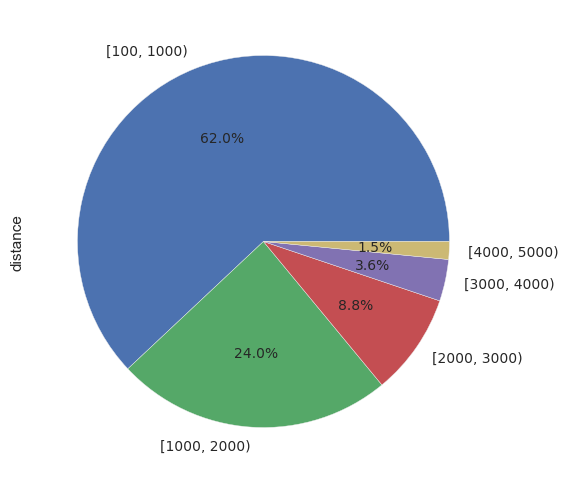

In [82]:
bins = [x for x in range(1000, 6000, 1000)]
bins.insert(0, 100)
pd.cut(shifted['distance'], bins, right=False).value_counts(sort=False).plot.pie(figsize=(6,6),autopct='%1.1f%%')

In [8]:
distance_ordered['distance'].sum()/1000/40000

5.415281964164653

单车的移动次数

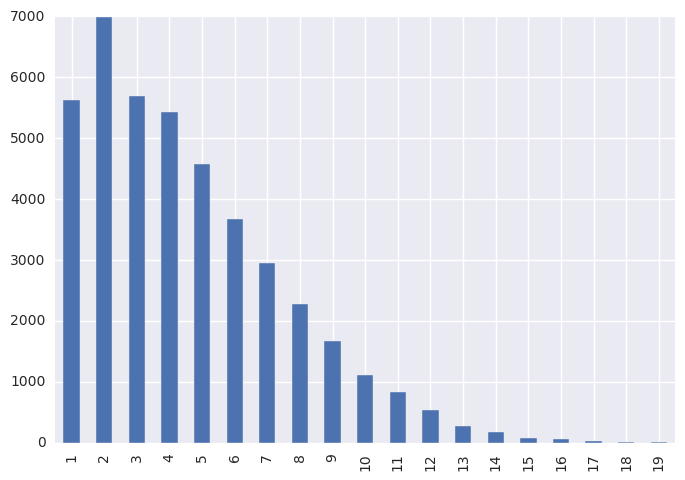

In [84]:
moved = shifted[shifted['distance']>100]
moved_grouped = moved.groupby('distid').size().sort_values(ascending=False)
moved_grouped.value_counts(sort=False).plot.bar()

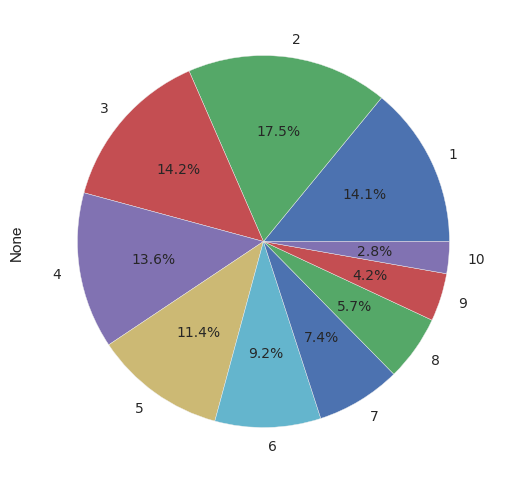

In [90]:
moved_grouped.value_counts(sort=False)[0:10].plot.pie(figsize=(6,6),autopct='%1.1f%%')

没有移动的车

In [10]:
((total_cycles -  moved_count['distance'])/total_cycles * 100)

31.112934996717005